In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sales_Data.csv to Sales_Data.csv
Saving Glance_Views.csv to Glance_Views.csv


In [ ]:
# upload both datasets onto file
import pandas as pd
sales_data= pd.read_csv('Sales_Data.csv')
sales_data.head()
glance_views = pd.read_csv('Glance_Views.csv')
glance_views.head()

,Unnamed: 0,SKU_NAME,FEED_DATE,VIEWS,UNITS
0,0,B1212:PZ:V,2019-05-01,455.0,16.0
1,1,B1212:PZ:V,2019-05-02,478.0,12.0
2,2,B1212:PZ:V,2019-05-03,681.0,42.0
3,3,B1212:PZ:V,2019-05-04,662.0,70.0
4,4,B1212:PZ:V,2019-05-05,568.0,33.0


In [ ]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41115 entries, 0 to 41114
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41115 non-null  int64  
 1   SKU_NAME         41115 non-null  object 
 2   FEED_DATE        41115 non-null  object 
 3   CATEGORY         41115 non-null  object 
 4   SUB_CATEGORY     41115 non-null  object 
 5   ORDERED_REVENUE  41115 non-null  float64
 6   ORDERED_UNITS    41115 non-null  float64
 7   REP_OOS          40426 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.5+ MB
None


In [ ]:
# Check for null values
print("Null values in the dataset:")
print(sales_data.isnull().sum())

# Drop null values
sales_data.dropna(inplace=True)

# Check for duplicates
print("\nNumber of duplicate rows in the dataset:")
print(sales_data.duplicated().sum())

Null values in the dataset:
Unnamed: 0           0
SKU_NAME             0
FEED_DATE            0
CATEGORY             0
SUB_CATEGORY         0
ORDERED_REVENUE      0
ORDERED_UNITS        0
REP_OOS            689
dtype: int64

Number of duplicate rows in the dataset:
0


In [ ]:
# importing the necessary  libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## 1. Identify the most expensive SKU on average , over the entire time period

In [ ]:
#identify the most expensive SKU on avg over entire time period
sales_data['average_price'] = sales_data['ORDERED_REVENUE'] / sales_data['ORDERED_UNITS']
most_expensive_sku = sales_data.groupby('SKU_NAME')['average_price'].mean().idxmax()
most_expensive_sku

'D217:4ZNF0'

# 2. What % of SKUs have generated some revenue in this time period?


In [ ]:
#What % of SKUs have generated some revenue in this time period?
sales_data['ORDERED_REVENUE'].sum()


90728125.12

In [ ]:
# Percentage distribution of Ordered Revenue of individual SKU , detecting the zeros and uniques
revenue_percentage = sales_data['ORDERED_REVENUE'].value_counts(normalize=True) * 100
print("Percentage distribution of Ordered Revenue :")
print(revenue_percentage)

Percentage distribution of Ordered Revenue :
ORDERED_REVENUE
0.00       31.419190
99.99       0.440229
199.98      0.325915
199.99      0.262678
149.99      0.245652
             ...    
241.56      0.002432
158.25      0.002432
313.33      0.002432
367.11      0.002432
9539.47     0.002432
Name: proportion, Length: 15506, dtype: float64


In [ ]:
# Group by SKU and sum the ORDERED_REVENUE for each SKU
sku_revenue = sales_data.groupby('SKU_NAME')['ORDERED_REVENUE'].sum()

total_revenue = sku_revenue.sum()

# Calculate the percentage contribution of each SKU
sku_revenue_percentage = (sku_revenue / total_revenue) * 100

print("Percentage contribution of each SKU to total Ordered Revenue:")
print(sku_revenue_percentage)


Percentage contribution of each SKU to total Ordered Revenue:
SKU_NAME
B004FMWNKW    0.082962
B004RU\O1U    0.000000
B004WQ8HS6    0.152380
B006KSCQKJ    0.218023
B007LUCJZW    0.814503
                ...   
D28QU2Q7[:    0.036913
D28ZI3PXUF    0.329169
D29CMS5Q6O    0.120805
D29OFPIPYD    0.063523
D29S5IMRDI    0.008883
Name: ORDERED_REVENUE, Length: 465, dtype: float64


In [ ]:
# Check SKUs with revenue
revenue_skus = sales_data[sales_data['ORDERED_REVENUE'] > 0]['SKU_NAME'].nunique()
total_skus = sales_data['SKU_NAME'].nunique()
percentage_revenue_skus = (revenue_skus / total_skus) * 100
print(percentage_revenue_skus)

78.70967741935485


In [ ]:
# identify which categories stopped selling after July
# filter data for July
july_sales = sales_data[sales_data['FEED_DATE'] > '2019-07-31']

# identify categories that stopped selling after July
stopped_sales = july_sales[july_sales['ORDERED_REVENUE'] == 0]['CATEGORY'].unique()
print(stopped_sales)

['1000 Inputs' '5000 Portable Media Players' '0400 Computer Peripherals'
 '5600 Video Components' '1500 Tablet Accessories'
 '10800 Xbox One Accessories' '5300 Headphones' '6200 PC Accessories']


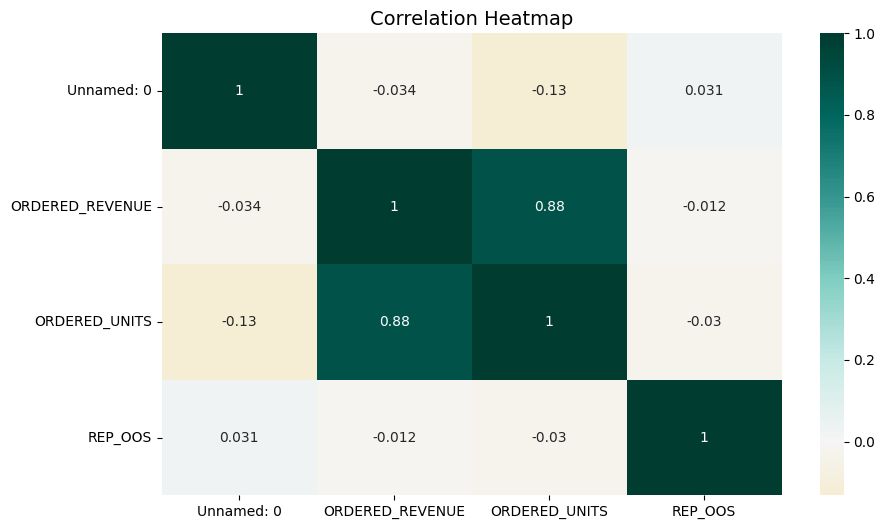

In [ ]:
plt.figure(figsize = (10,6))
heatmap = sns.heatmap(sales_data.corr(numeric_only=True), annot=True, cmap='BrBG', center=0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14})
plt.show()

In [ ]:
#revenue by month
rev_month = sales_data.groupby('FEED_DATE')['ORDERED_REVENUE'].sum()
print('rev_month')


rev_month


# 3. Identify significant spikes in sales (possible sale events)

In [ ]:
# Identify significant spikes in sales (possible sale events)
monthly_sales = sales_data.groupby('FEED_DATE')['ORDERED_REVENUE'].max().reset_index()
monthly_sales['FEED_DATE'].tolist()


['2019-05-01',
 '2019-05-02',
 '2019-05-03',
 '2019-05-04',
 '2019-05-05',
 '2019-05-06',
 '2019-05-07',
 '2019-05-08',
 '2019-05-09',
 '2019-05-10',
 '2019-05-11',
 '2019-05-12',
 '2019-05-13',
 '2019-05-14',
 '2019-05-15',
 '2019-05-16',
 '2019-05-17',
 '2019-05-18',
 '2019-05-19',
 '2019-05-20',
 '2019-05-21',
 '2019-05-22',
 '2019-05-23',
 '2019-05-24',
 '2019-05-25',
 '2019-05-26',
 '2019-05-27',
 '2019-05-28',
 '2019-05-29',
 '2019-05-30',
 '2019-05-31',
 '2019-06-01',
 '2019-06-02',
 '2019-06-03',
 '2019-06-04',
 '2019-06-05',
 '2019-06-06',
 '2019-06-07',
 '2019-06-08',
 '2019-06-09',
 '2019-06-10',
 '2019-06-11',
 '2019-06-12',
 '2019-06-13',
 '2019-06-14',
 '2019-06-15',
 '2019-06-16',
 '2019-06-17',
 '2019-06-18',
 '2019-06-19',
 '2019-06-20',
 '2019-06-21',
 '2019-06-22',
 '2019-06-23',
 '2019-06-24',
 '2019-06-25',
 '2019-06-26',
 '2019-06-27',
 '2019-06-28',
 '2019-06-29',
 '2019-06-30',
 '2019-07-01',
 '2019-07-02',
 '2019-07-03',
 '2019-07-04',
 '2019-07-05',
 '2019-07-

In [ ]:
group = sales_data.groupby('FEED_DATE')['ORDERED_REVENUE'].sum()
group

FEED_DATE
2019-05-01    803075.96
2019-05-02    748069.15
2019-05-03    697811.63
2019-05-04    399447.01
2019-05-05    426373.56
                ...    
2019-08-27    735040.43
2019-08-28    772380.43
2019-08-29    738271.94
2019-08-30    660804.22
2019-08-31    415669.99
Name: ORDERED_REVENUE, Length: 123, dtype: float64

# 4. (Dependent on 3) Does having a sale event cannibalize sales in the immediate aftermath? Highlighting a few examples would suffice

<Axes: xlabel='FEED_DATE', ylabel='ORDERED_REVENUE'>

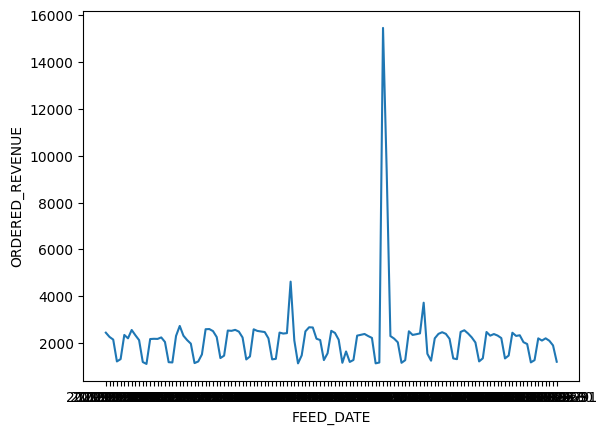

In [ ]:

# Calculate average revenue by FEED_DATE
average_revenue_by_date = sales_data.groupby('FEED_DATE')['ORDERED_REVENUE'].mean().reset_index()

# Create line plot
sns.lineplot(x='FEED_DATE', y='ORDERED_REVENUE', data=average_revenue_by_date)

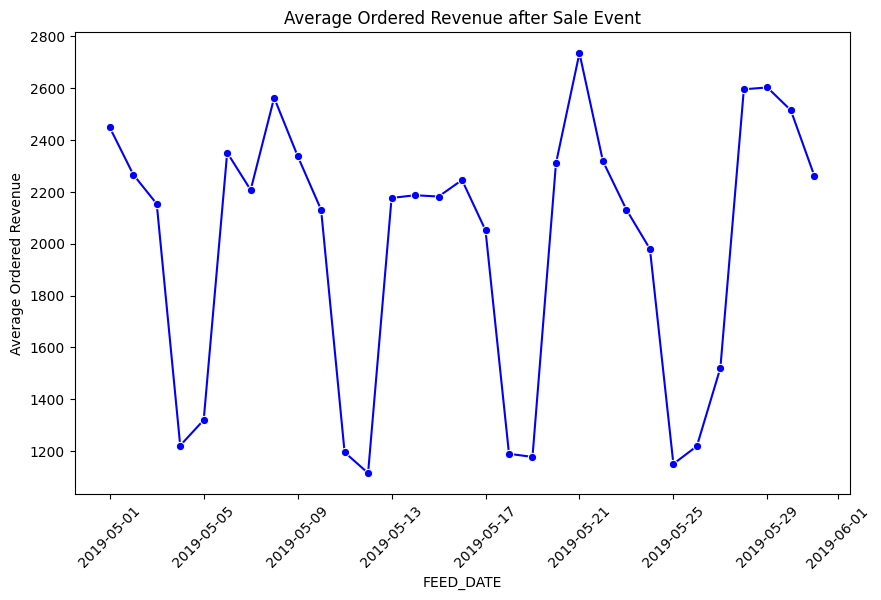

In [ ]:


# Filter data for May and August
filtered_data = average_revenue_by_date[(average_revenue_by_date['FEED_DATE'].dt.month.isin([5, 9])) &
                                        (average_revenue_by_date['FEED_DATE'].dt.year == 2019)]

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='FEED_DATE', y='ORDERED_REVENUE', data=filtered_data, marker='o', color='blue')

# Format plot
plt.title('Average Ordered Revenue after Sale Event')
plt.xlabel('FEED_DATE')
plt.ylabel('Average Ordered Revenue')
plt.xticks(rotation=45)


# Show plot
plt.show()


## ** 5. In each category, find the subcategory that has grown slowest relative to the category it is present in. If you were handling the entire portfolio, which of these subcategories would you be most concerned with?**

In [ ]:
# what are the categories and subcategory in our data
types_of_category = sales_data['CATEGORY'].unique()
print(types_of_category)

['1000 Inputs' '5000 Portable Media Players' '5600 Video Components'
 '0400 Computer Peripherals' '1500 Tablet Accessories'
 '10800 Xbox One Accessories' '5300 Headphones' '6200 PC Accessories'
 '0100 Wireless Phones' '1600 Sony PSP Games and Software']


In [ ]:
#To know which of these subcategories should we be concerned with according to their total sales
total_sales =sales_data.groupby('SUB_CATEGORY')['ORDERED_REVENUE'].agg(total_sales='sum').sort_values(by='total_sales',ascending=False)
total_sales

,total_sales
SUB_CATEGORY,
1002 Mice,23290337.91
1001 Keyboards,22425163.19
1005 Webcams,12230209.80
1004 Computer Headsets and Mics,8151870.97
1006 Gamepads and Controllers,5855070.12
5045 Media Speaker Systems,5765041.39
1003 Computer Speakers,4830543.40
5610 A/V Remote Controls,2200516.21
10830 Headsets,1206332.62


In [ ]:
number_of_subcategory =sales_data['SUB_CATEGORY'].value_counts().reset_index()
number_of_subcategory.columns = ['SUB_CATEGORY', 'NUMBER_OF_SUBCATEGORY']
print(number_of_subcategory)

                                 SUB_CATEGORY  NUMBER_OF_SUBCATEGORY
0                                   1002 Mice                   8692
1                              1001 Keyboards                   5871
2                  5045 Media Speaker Systems                   5086
3             1004 Computer Headsets and Mics                   4206
4                      1003 Computer Speakers                   3043
5                                1005 Webcams                   2676
6               1006 Gamepads and Controllers                   2275
7                    5610 A/V Remote Controls                   1898
8                             5310 Headphones                   1857
9                              10830 Headsets                   1399
10              1590 Other Tablet Accessories                   1074
11           1610 Classic Games & RetroArcade                    780
12                  5010 Other Portable Audio                    680
13         1501 Tablet Carrying Ca

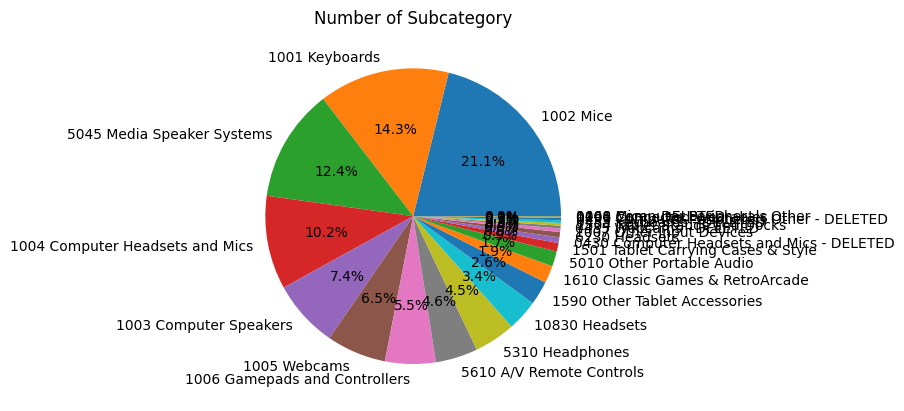

In [ ]:
plt.pie(number_of_subcategory['NUMBER_OF_SUBCATEGORY'], labels=number_of_subcategory['SUB_CATEGORY'], autopct='%1.1f%%')
plt.title('Number of Subcategory')
plt.show()

In [ ]:
# Understanding Category Segementations , according to sales
sales_per_subcategory = sales_data.groupby('SUB_CATEGORY')['ORDERED_REVENUE'].sum().reset_index()
sales_per_subcategory = sales_per_subcategory.rename(columns={'ORDERED_REVENUE': 'SALES'})
sales_per_subcategory = sales_per_subcategory.sort_values(by='SALES', ascending=False)
sales_per_subcategory

,SUB_CATEGORY,SALES
7,1002 Mice,23290337.91
6,1001 Keyboards,22425163.19
10,1005 Webcams,12230209.80
9,1004 Computer Headsets and Mics,8151870.97
11,1006 Gamepads and Controllers,5855070.12
20,5045 Media Speaker Systems,5765041.39
8,1003 Computer Speakers,4830543.40
22,5610 A/V Remote Controls,2200516.21
14,10830 Headsets,1206332.62
17,1590 Other Tablet Accessories,1130959.06


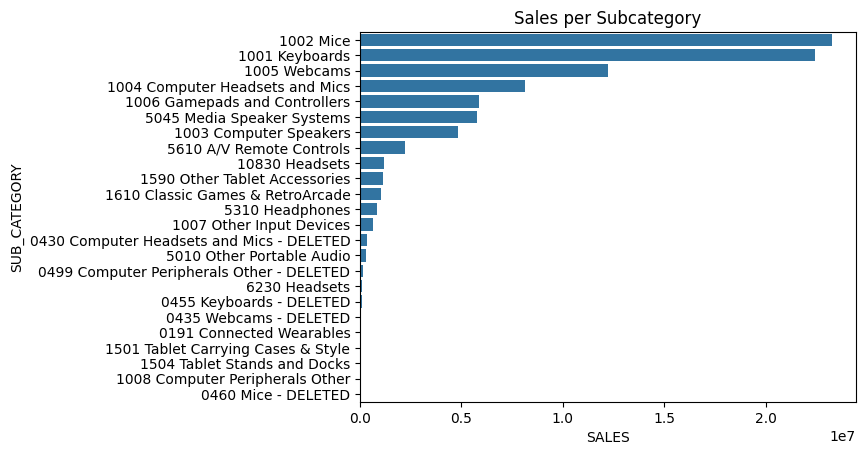

In [ ]:
#Visualizing Sales across Subcategory
plt.title('Sales per Subcategory')
sns.barplot(x='SALES', y='SUB_CATEGORY', data=sales_per_subcategory)
plt.show()

In [ ]:
# Larger rectangles denote higher sales
fig = px.treemap(sales_data, path=['CATEGORY', 'SUB_CATEGORY'], values='ORDERED_REVENUE')
fig.show()

In [ ]:
# calulate the sales frequency for each unique SKU Name
sku_freq = sales_data.groupby('SKU_NAME')['FEED_DATE'].count().reset_index()
sku_freq.columns = ['SKU_NAME', 'FREQUENCY']
sku_freq = sku_freq.sort_values(by='FREQUENCY', ascending=False)
sku_freq

,SKU_NAME,FREQUENCY
421,D21G77EFEH,123
413,D20[LLB9ZG,123
294,C283LHHX6L,123
292,C279IT97C4,123
412,D20JUJF[UO,123
...,...,...
122,B21E\9ZKDH,1
114,B213K5FIPU,1
426,D21MYLC9K6,1
428,D223J6HIOC,1


In [ ]:
# contains SKU having repeated sales means have higher frequency
repeat_sku = sku_freq[sku_freq['FREQUENCY'] > 1]
repeat_sku_sorted = repeat_sku.sort_values(by='SKU_NAME', ascending = False)
repeat_sku

,SKU_NAME,FREQUENCY
421,D21G77EFEH,123
413,D20[LLB9ZG,123
294,C283LHHX6L,123
292,C279IT97C4,123
412,D20JUJF[UO,123
...,...,...
171,C024XPOJL[,2
431,D225JQ6249,2
169,C02228YPPT,2
152,C0038K4UWZ,2
